# 2.2 Waveform read for Ricker wavelet at top receiver

### This notebook is to plot the waveforms for the data of wavefields.
#### ...........................................................................................................................................................................................
#### Initially edited by Salvus group of ETH (https://salvus.io/)
#### Modified by Yingjie Gao (gaoyingjie@mail.iggcas.ac.cn;gaoyingjie12@mails.ucas.ac.cn) 
#### Institute of Geology and Geophysics, Chinase Academy of Sciences, Beijing, China, 100029
#### ...........................................................................................................................................................................................

In [1]:
%matplotlib inline

# This line helps with tab-completion of the simple_config objects.
# The IPython/Jupyter project default to a differnet inference based
# tab completion engine which unfortunately does not yet fully work
# with salvus_flow. This is completely optional and a convenience
# option.
%config Completer.use_jedi = False
# Standard Python packages
import toml
import numpy as np
import matplotlib.pyplot as plt

# Workflow management.
import salvus_flow.api

# Specific objects to aid in setting up simulations.
from pyasdf import ASDFDataSet
from salvus_mesh.simple_mesh import basic_mesh
import salvus_flow.simple_config as sc

import matplotlib.pyplot as plt
import numpy as np

import salvus_flow.simple_config as config
import salvus_toolbox.toolbox as st
import salvus_toolbox.toolbox_geotech as st_geo
from salvus_flow import api

In [2]:
# Read in data.
rec_file = "output-built-in-stf/receivers.h5"
# rec_file = "/media/ygao/Elements/salvus data/Ricker reciever/receivers.h5"
#field = "displacement"
field = "gradient-of-displacement"
uxx, dt, extent = st.get_shotgather(rec_file, field=field, cmp=0, axis=1)
uxy, _, _ = st.get_shotgather(rec_file, field=field, cmp=1, axis=1)
uyx, _, _ = st.get_shotgather(rec_file, field=field, cmp=2, axis=1)
uyy, _, _ = st.get_shotgather(rec_file, field=field, cmp=3, axis=1)

# Read in data.
rec_file = "output-built-in-stf/receivers.h5"
# rec_file = "/media/ygao/Elements/salvus data/Ricker reciever/receivers.h5"
field = "velocity"
vx, dt, extent = st.get_shotgather(rec_file, field=field, cmp=0, axis=1)
vy, _, _ = st.get_shotgather(rec_file, field=field, cmp=1, axis=1)

# Read in data.
rec_file = "output-built-in-stf/receivers.h5"
# rec_file = "/media/ygao/Elements/salvus data/Ricker reciever/receivers.h5"
field = "acceleration"
vxt, dt, extent = st.get_shotgather(rec_file, field=field, cmp=0, axis=1)
vyt, _, _ = st.get_shotgather(rec_file, field=field, cmp=1, axis=1)

Text(0, 0.5, 'Amplitude')

<Figure size 432x288 with 0 Axes>

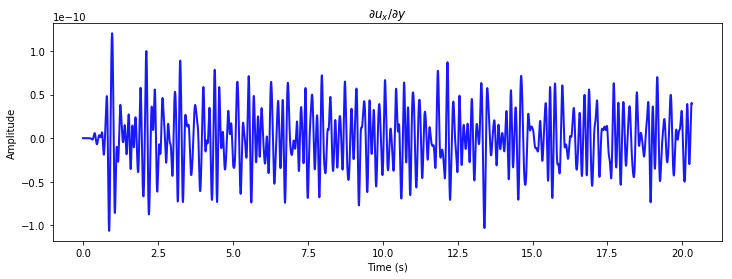

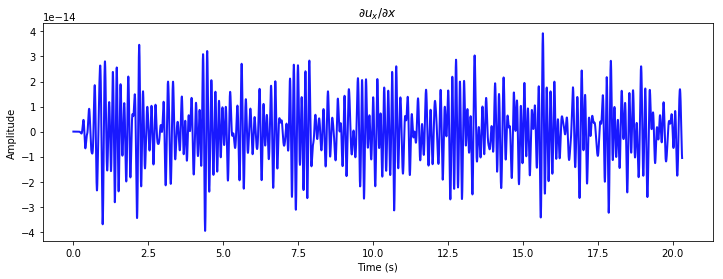

In [4]:
#import numpy as np
# phython from 0 to n-1
nt,nx=np.shape(uxy)
nt
tt=np.linspace(0,(nt-1)*dt,nt)
plt.figure(1)
plt.figure(figsize=(12,4)) 
plt.plot(tt,uxy[:,nx-1],color="blue",linewidth=2.0,linestyle="-",alpha=0.9) 
plt.title(r"$\partial u_x / \partial y$")
plt.xlabel('Time (s)') 
plt.ylabel('Amplitude') 

plt.figure(2)
plt.figure(figsize=(12,4)) 
plt.plot(tt,uxx[:,nx-1],color="blue",linewidth=2.0,linestyle="-",alpha=0.9) 
plt.title(r"$\partial u_x / \partial x$")
plt.xlabel('Time (s)') 
plt.ylabel('Amplitude') 

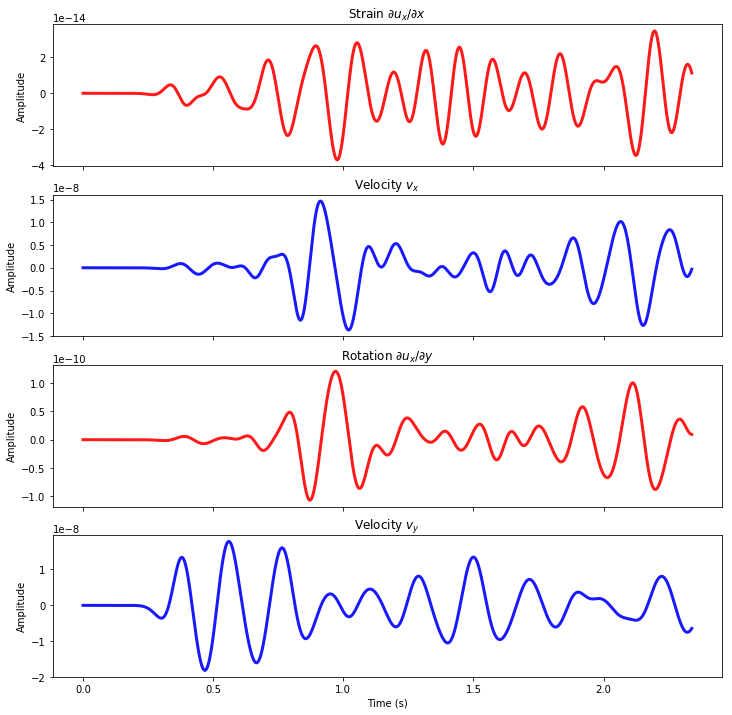

In [8]:
f, ax = plt.subplots(4, 1, figsize=(12, 12), sharex=True)

# Plot the different fields.

ax[0].plot(tt[0:200000],uxx[0:200000,nx - 1],color="red",linewidth=3.0,linestyle="-",alpha=0.9) 
ax[1].plot(tt[0:200000],vx[0:200000,nx - 1],color="blue",linewidth=3.0,linestyle="-",alpha=0.9)
ax[2].plot(tt[0:200000],uxy[0:200000,nx - 1],color="red",linewidth=3.0,linestyle="-",alpha=0.9) 
ax[3].plot(tt[0:200000],vy[0:200000,nx - 1],color="blue",linewidth=3.0,linestyle="-",alpha=0.9)

# Label plots

ax[0].set_title(r"Strain $\partial u_x / \partial x$")
ax[1].set_title(r"Velocity $v_x$")
ax[2].set_title(r"Rotation $\partial u_x / \partial y$")
ax[3].set_title(r"Velocity $v_y$")

# Label axes.
ax[0].set_ylabel("Amplitude")
ax[1].set_ylabel("Amplitude")
ax[2].set_ylabel("Amplitude")
ax[3].set_ylabel("Amplitude")
ax[3].set_xlabel("Time (s)")

plt.savefig('Top-waveforms comparison Rotation for Ricker stf.png')

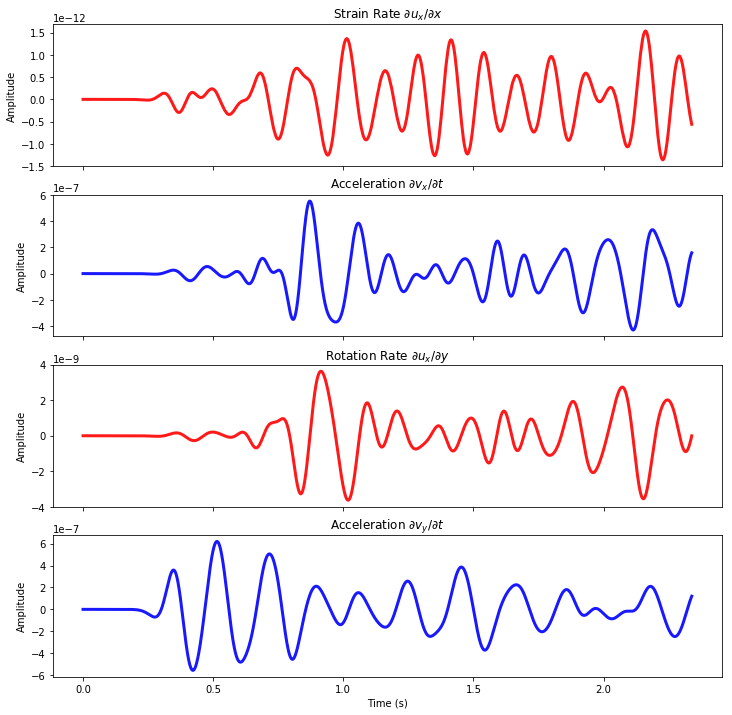

In [9]:
import numpy as np

uxy_t=np.diff(uxy[:, nx-1])/dt
uxx_t=np.diff(uxx[:, nx-1])/dt

f, ax = plt.subplots(4, 1, figsize=(12, 12), sharex=True)

# Plot the different fields.

ax[0].plot(tt[0:200000],uxx_t[0:200000],color="red",linewidth=3.0,linestyle="-",alpha=0.9) 
ax[1].plot(tt[0:200000],vxt[0:200000,nx - 1],color="blue",linewidth=3.0,linestyle="-",alpha=0.9)
ax[2].plot(tt[0:200000],uxy_t[0:200000],color="red",linewidth=3.0,linestyle="-",alpha=0.9) 
ax[3].plot(tt[0:200000],vyt[0:200000,nx - 1],color="blue",linewidth=3.0,linestyle="-",alpha=0.9)

# Label plots

ax[0].set_title(r"Strain Rate $\partial u_x / \partial x$")
ax[1].set_title(r"Acceleration $\partial v_x / \partial t$")
ax[2].set_title(r"Rotation Rate $\partial u_x / \partial y$")
ax[3].set_title(r"Acceleration $\partial v_y / \partial t$")

# Label axes.
ax[0].set_ylabel("Amplitude")
ax[1].set_ylabel("Amplitude")
ax[2].set_ylabel("Amplitude")
ax[3].set_ylabel("Amplitude")
ax[3].set_xlabel("Time (s)")
plt.savefig('Top-waveforms comparison rotation rate for Ricker stf.png')

Text(0, 0.5, 'Amplititude')

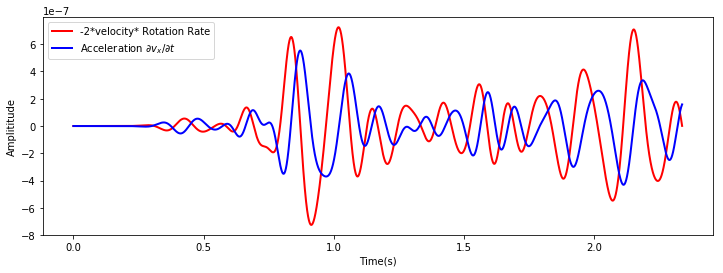

In [10]:
plt.figure(figsize=(12,4)) 
l1,=plt.plot(tt[0:200000],-uxy_t[0:200000]*200,label="$sin(x)$",color="red",linewidth=2)    # time direvetive of rotation
l2,=plt.plot(tt[0:200000],vxt[0:200000, nx-1],label="$sin(x)$",color="blue",linewidth=2)    #acceleration
# 设置legend
plt.legend(handles = [l1, l2, ], labels = [r"-2*velocity* Rotation Rate", r"Acceleration $\partial v_x / \partial t$"], loc = 'best')
plt.xlabel("Time(s)")
plt.ylabel("Amplititude")

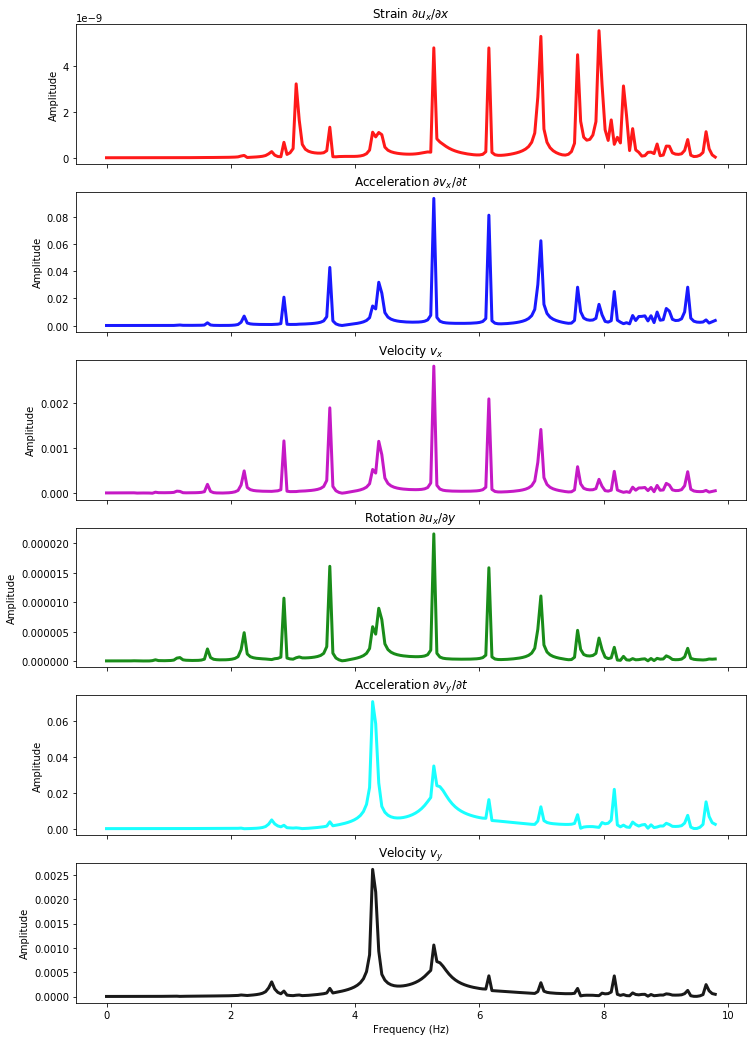

In [11]:
from scipy.fftpack import fft,ifft 

nt,nx=np.shape(uxy)

ff_uxy=fft(uxy[0:nt-1,3])
ff_uxx=fft(uxx[0:nt-1,3])

ff_vxt=fft(vxt[0:nt-1,3])
ff_vyt=fft(vyt[0:nt-1,3])

ff_vx=fft(vx[0:nt-1,3])
ff_vy=fft(vy[0:nt-1,3])


# calculate the frquency
freq=1/dt/(nt*dt)*tt
f, ax = plt.subplots(6, 1, figsize=(12, 18), sharex=True)

# Plot the different fields.
ax[0].plot(freq[0:200],abs(ff_uxx)[0:200],color="red",linewidth=3.0,linestyle="-",alpha=0.9)   #20s
ax[1].plot(freq[0:200],abs(ff_vxt)[0:200],color="blue",linewidth=3.0,linestyle="-",alpha=0.9)
ax[3].plot(freq[0:200],abs(ff_uxy)[0:200],color="green",linewidth=3.0,linestyle="-",alpha=0.9)   #20s
ax[4].plot(freq[0:200],abs(ff_vyt)[0:200],color="cyan",linewidth=3.0,linestyle="-",alpha=0.9)
ax[2].plot(freq[0:200],abs(ff_vx)[0:200],color="m",linewidth=3.0,linestyle="-",alpha=0.9)   #20s
ax[5].plot(freq[0:200],abs(ff_vy)[0:200],color="k",linewidth=3.0,linestyle="-",alpha=0.9)

# Label plots
ax[0].set_title(r"Strain $\partial u_x / \partial x$")
ax[1].set_title(r"Acceleration $\partial v_x / \partial t$")
ax[3].set_title(r"Rotation $\partial u_x / \partial y$")
ax[4].set_title(r"Acceleration $\partial v_y / \partial t$")
ax[2].set_title(r"Velocity $v_x$")
ax[5].set_title(r"Velocity $v_y$")

# Label axes.
ax[0].set_ylabel("Amplitude")
ax[1].set_ylabel("Amplitude")
ax[2].set_ylabel("Amplitude")
ax[3].set_ylabel("Amplitude")
ax[4].set_ylabel("Amplitude")
ax[5].set_ylabel("Amplitude")
ax[5].set_xlabel("Frequency (Hz)")

plt.savefig('Top-5 Hz 20s waveforms comparison spetral for Ricker stf.png')

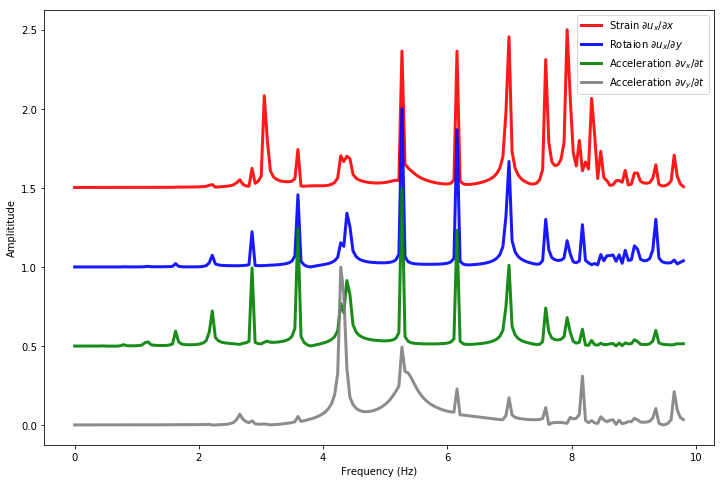

In [12]:
# Normalization
ff_uxx_norm=abs(ff_uxx)[0:200] / abs(ff_uxx)[0:200].max(axis=0)
ff_uxy_norm=abs(ff_uxy)[0:200] / abs(ff_uxy)[0:200].max(axis=0)
ff_vxt_norm=abs(ff_vxt)[0:200] / abs(ff_vxt)[0:200].max(axis=0)
ff_vyt_norm=abs(ff_vyt)[0:200] / abs(ff_vyt)[0:200].max(axis=0)

plt.figure(figsize=(12,8)) 
l1,=plt.plot(freq[0:200],ff_uxx_norm + 1.5,color="red",linewidth=3.0,linestyle="-",alpha=0.9)   #20s
l2,=plt.plot(freq[0:200],ff_vxt_norm + 1.0,color="blue",linewidth=3.0,linestyle="-",alpha=0.9)
l3,=plt.plot(freq[0:200],ff_uxy_norm + 0.5,color="green",linewidth=3.0,linestyle="-",alpha=0.9)   #20s
l4,=plt.plot(freq[0:200],ff_vyt_norm,color="grey",linewidth=3.0,linestyle="-",alpha=0.9)

# legend
plt.legend(handles = [l1, l2, l3, l4,], labels = [r"Strain $\partial u_x / \partial x$" \
                                              , r"Rotaion $\partial u_x / \partial y$" \
                                              , r"Acceleration $\partial v_x / \partial t$" \
                                              , r"Acceleration $\partial v_y / \partial t$"] \
           
        , loc = 'best')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplititude")
plt.savefig('Top-5 Hz 20s waveforms comparison spetral together for Ricker stf.png')

## Calculate the derivative of the rotation Ux/y

Text(0, 0.5, 'Amplititude')

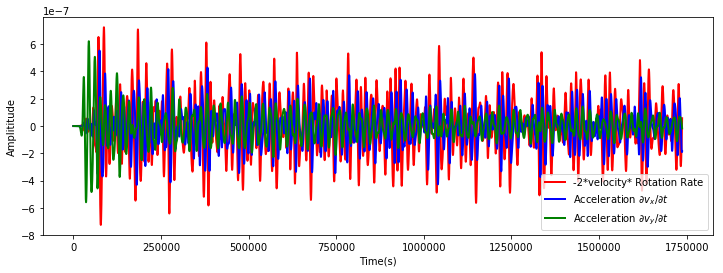

In [14]:
import numpy as np
uxy_t=np.diff(uxy[:, nx-1])/dt
# uxy_t=np.diff(uxy[:, nx-1])
plt.figure(figsize=(12,4)) 
l1,=plt.plot(-uxy_t*200,color="red",linewidth=2)    # time direvetive of rotation
l2,=plt.plot(vxt[:, nx-1],color="blue",linewidth=2)    #acceleration
l3,=plt.plot(vyt[:, nx-1],color="green",linewidth=2)    #acceleration
# legend
plt.legend(handles = [l1, l2, l3,], labels = [r"-200* Rotation Rate", r"Acceleration $\partial v_x / \partial t$", r"Acceleration $\partial v_y / \partial t$"], loc = 'best')
plt.xlabel("Time(s)")
plt.ylabel("Amplititude")

Text(0, 0.5, 'Amplititude')

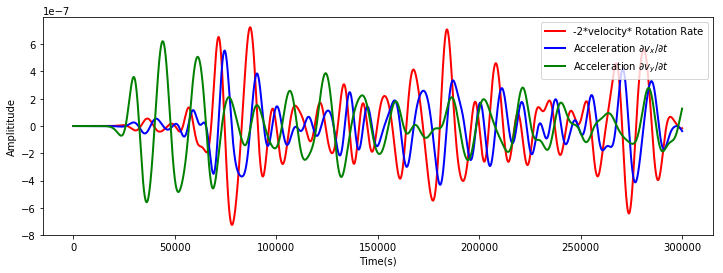

In [15]:
plt.figure(figsize=(12,4)) 
l1,=plt.plot(-uxy_t[0:300000]*200,color="red",linewidth=2)    # time direvetive of rotation
l2,=plt.plot(vxt[0:300000, nx-1],color="blue",linewidth=2)    #acceleration
l3,=plt.plot(vyt[0:300000, nx-1],color="green",linewidth=2)    #acceleration
# 设置legend
plt.legend(handles = [l1, l2, l3,], labels = [r"-2*velocity* Rotation Rate", r"Acceleration $\partial v_x / \partial t$", r"Acceleration $\partial v_y / \partial t$"], loc = 'best')
plt.xlabel("Time(s)")
plt.ylabel("Amplititude")

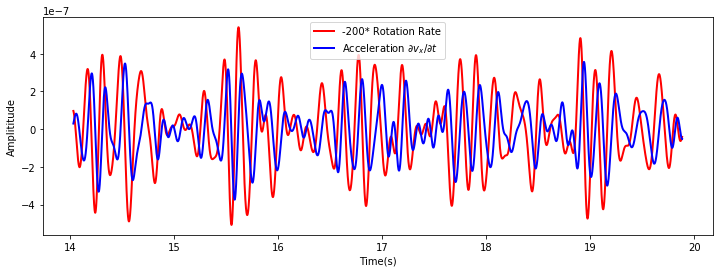

In [16]:
plt.figure(figsize=(12,4)) 
start_n=1200000
end_n=1700000
l1,=plt.plot(tt[start_n:end_n],-uxy_t[start_n:end_n]*200,color="red",linewidth=2)    # time direvetive of rotation
l2,=plt.plot(tt[start_n:end_n],vxt[start_n:end_n, nx-1],color="blue",linewidth=2)    #acceleration
# legend
# plt.legend(handles = [l1, l2,], labels = [r"-2*velocity* Rotation Rate", r"Acceleration $\partial v_x / \partial t$"], loc = 'best')
plt.legend(handles = [l1, l2,], labels = [r"-200* Rotation Rate", r"Acceleration $\partial v_x / \partial t$"], loc = 'best')

plt.xlabel("Time(s)")
plt.ylabel("Amplititude")

plt.savefig('Top-comparison of the rotation rate and the acceleration for Ricker stf.png')